<a href="https://colab.research.google.com/github/SuyCal/friendly-repository-/blob/main/assesment_enron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-sql

The location of the file is loadedin the code sequence (either the extract.db file, or the enron_sqlite3.db file). 

In [203]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

In [134]:
import sqlite3
import pandas as pd
from pandas.util.testing import makeTimeDataFrame
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
conn = sqlite3.connect('/content/drive/MyDrive/enron_sqlite3.db')   #location of database as per requirements

In [101]:
from sqlite3.dbapi2 import Cursor         #cursor initiation
cur = conn.cursor()  

In [205]:
datasample = pd.read_sql_query('SELECT * FROM Message', conn)

In [ ]:
datasample  #note index for each row starts with index value 0

In [207]:
type(datasample) #type check

pandas.core.frame.DataFrame

In [ ]:
datasample.mid  #note ".iloc" function canbe used to search for specific index values

In [209]:
sql1='''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message 
  GROUP BY date_sent
  ORDER BY message_count 
  DESC
  LIMIT 10; 
  '''
busiest_email_days = open('Busiest email days', 'w')      #opens up txt file

date_sort = cur.execute(sql1)      #writes query results to txt file
for row in date_sort:
  busiest_email_days.writelines(str(row))
  busiest_email_days.writelines('\n')
  print(row)
busiest_email_days.close()


('2001-10-25', 2207)
('2001-10-29', 2180)
('2001-11-27', 2045)
('2001-11-26', 2031)
('2001-10-22', 2025)
('2001-10-26', 1978)
('2001-10-24', 1936)
('2001-11-19', 1909)
('2002-01-30', 1783)
('2001-10-23', 1763)


This querry displays the top 10 days with the mot email sent.

In [90]:
datasample = pd.read_sql_query('SELECT sender FROM Message', conn)

In [95]:
type(datasample)

pandas.core.frame.DataFrame

In [ ]:
message_id = datasample[datasample.mid == 'mid']

In [41]:
sql ='''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message 
  GROUP BY date_sent
  ORDER BY date_sent ;
'''
rows = cur.execute(sql)
for row in rows:
   print(row)

('2000-01-21', 1)
('2000-01-24', 2)
('2000-02-02', 1)
('2000-02-07', 1)
('2000-05-17', 1)
('2000-05-21', 1)
('2000-06-07', 1)
('2000-06-21', 1)
('2000-06-27', 1)
('2000-07-10', 1)
('2000-07-25', 1)
('2000-07-27', 1)
('2000-07-31', 2)
('2000-08-02', 2)
('2000-08-03', 3)
('2000-08-04', 3)
('2000-08-07', 2)
('2000-08-08', 1)
('2000-08-09', 2)
('2000-08-11', 2)
('2000-08-14', 2)
('2000-08-15', 2)
('2000-08-16', 3)
('2000-08-17', 3)
('2000-08-18', 1)
('2000-08-20', 2)
('2000-08-21', 1)
('2000-08-22', 6)
('2000-08-23', 9)
('2000-08-24', 16)
('2000-08-25', 15)
('2000-08-26', 5)
('2000-08-27', 1)
('2000-08-28', 16)
('2000-08-29', 22)


In [155]:
dfsampledate = pd.read_sql_query('SELECT date(date) AS date_sent1 FROM Message group BY date(date)', conn)

In [ ]:
dfsampledate 

In [103]:
dfsamplemid = pd.read_sql_query('SELECT count(mid) AS num_messages FROM Message GROUP BY date(date)', conn) 

In [ ]:
dfsamplemid


OutOfBoundsDatetime: ignored

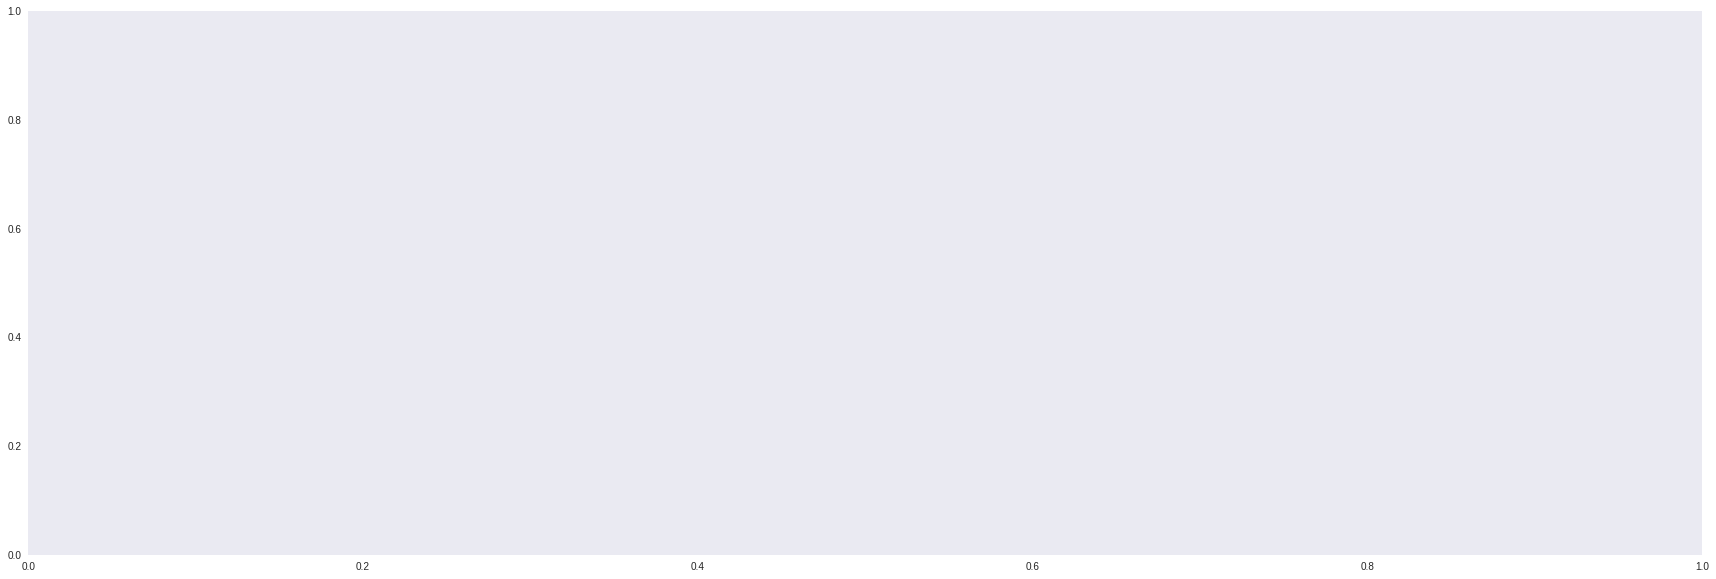

In [157]:
fig = plt.subplots(figsize = (30,10))        #size of plotting figure
x =dfsampledate.date_sent1
y = dfsamplemid.num_messages
#plt.bar(x,y)

plt.style.use('seaborn-deep')


dfsampledate.set_index('date_sent1', inplace = True)
dfsampledate.index = pd.to_datetime(dfsampledate.index).date

ax = dfsampledate['date'].plot()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

#df.set_index('date_sent1', inplace = True)
#df.index = pd.to_datetime(df.index).date

ax = df['dfsampledate'].bar()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()



plt.yticks(np.arange(0, max(y),200))

plt.title("Number of Emails sent per day")      #title

plt.legend(['Number of e-mails sent'])
plt.bar(x,y)
plt.show()

In [104]:
sql2='''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count
 DESC
 LIMIT 10  
 ;
'''
df = open('Top 10 E-mail senders', 'w')

top_10 = cur.execute(sql2)
for row in top_10:
  df.writelines(str(row))
  df.writelines('\n')
  print(row)
df.close()


('jeff.dasovich@enron.com', 6273)
('j.kaminski@enron.com', 5838)
('kay.mann@enron.com', 5100)
('sara.shackleton@enron.com', 4797)
('tana.jones@enron.com', 4437)
('chris.germany@enron.com', 3686)
('no.address@enron.com', 3511)
('enron.announcements@enron.com', 2838)
('matthew.lenhart@enron.com', 2784)
('debra.perlingiere@enron.com', 2549)


Top 10 email senders are jeff dasovich, J Kamiski, Kay Mann, Sara Shackleton, Tana Jones, Chris Germany, No address (exe email), Enron announcement (exe email), Matthew Lenhart, Debra Perlingiere. 2 additonal non-exe email senders : Pete Pavis and Steven J Kean. 

(How to Write to a Text File the Output of for Loop in Python -, n.d.)
(Python Write to File Line by Line, 2018)

In [105]:
top10name = pd.read_sql_query('SELECT sender AS name_sender, count(mid) AS message_num From Message GROUP BY name_sender ORDER BY message_num DESC LIMIT 10', conn)

In [ ]:
top10name

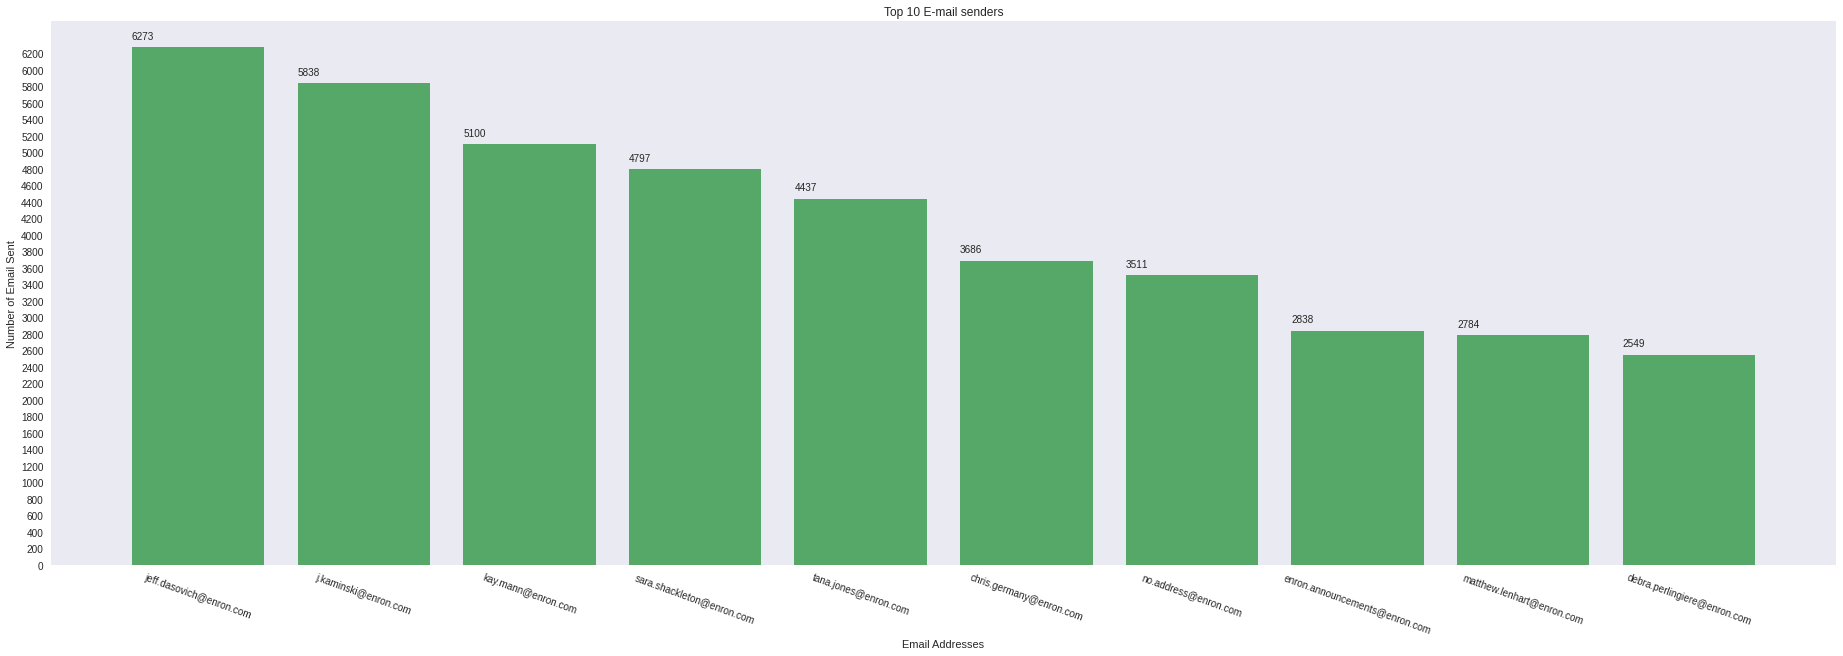

In [132]:
fig = plt.subplots(figsize = (32,10))        #siz0e of plotting figure
x = top10name.name_sender
y = top10name.message_num

plt.style.use('seaborn-deep')

plt.title("Top 10 E-mail senders")
plt.bar(x,y)

plt.yticks(np.arange(0, max(y),200))   #sets range of y-axis, along side with increments (here being an increase of 200 units)

plt.xlabel("Email Addresses")
plt.ylabel("Number of Email Sent")

plt.xticks(rotation= -20)    #rotation of email (formatting)

for bar in plt.bar(x,y):                    #displays the exact number of emails at the top of each bar (Matplotlib - Python - How to Show Values on Top of Bar Plot, n.d.)
  yval = bar.get_height()
  plt.text(bar.get_x(), yval + 100, yval)
  
plt.legend(['Number of e-mails sent'])

plt.show()

(Matplotlib - Python - How to Show Values on Top of Bar Plot, n.d.) - exact number appearing on each bar

(Kite, n.d.) - Rotation of X axis graduations

In [ ]:
sql5 ='''
SELECT rvalue AS rid_rec
  FROM recipientinfo
  group by rvalue
  ORDER BY rvalue
  DESC
  LIMIT 20 ;
'''
rows1 = cur.execute(sql5)
for row in rows1:
   print(row)

In [ ]:
input_email_address = 'carla.hoffman@enron.com' #@param{type:"string"}
datasample == input_email_address 

df = pd.DataFrame(datasample, columns=['sender'])
count = df[datasample.sender].sum()
print('Count of emails for address is : ', count)



#try to see if true can be isolated and counted

NCR